In [102]:
# import all relevant packages
import pandas as pd
from pandas import DataFrame
from pandas import read_csv

import numpy as np
from numpy.polynomial import Polynomial

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime

import scipy
from scipy import fftpack
from scipy.signal import savgol_filter
from scipy import stats
from scipy.stats.stats import pearsonr

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [50]:
# import the data set 

# create a custom date parse function for the data
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")

# create an easy variable for the .csv file path
file = r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\PhenoCompare.csv'

# load in the .csv using pandas.read_csv and set the index as the column date 
df = read_csv(file, header=0, #, parse_dates=[1,2], date_parser=custom_date_parser, 
              na_values = ['NaT'], index_col = 0)


print(df)
# inquire the dataframe
df.info()

          SRO_SoS  SRO_StartDateDelta     SRO_EoS  SRO_EndDateDelta  \
Index                                                                 
1999   10/01/1999                10.0  02/12/1999               336   
2000   29/01/2000                29.0  03/11/2000               308   
2001   18/02/2001                49.0  22/11/2001               326   
2002   19/01/2002                19.0  27/10/2002               300   
2003   06/02/2003                37.0  05/11/2003               309   
2004   26/02/2004                57.0  04/11/2004               309   
2005   27/02/2005                58.0  24/11/2005               328   
2006   19/02/2006                50.0  10/12/2006               344   
2007   08/02/2007                39.0  18/11/2007               322   
2008   31/01/2008                31.0  03/11/2008               308   
2009   16/02/2009                47.0  06/11/2009               310   
2010   28/01/2010                28.0  17/11/2010               321   
2011  

In [ ]:
## SoS

In [75]:
df_n = df.drop(1999)
df_s = df_n[['SRO_StartDateDelta','MOD17_GPP_StartDateDelta' ]]
df_e = df_n[['SRO_EndDateDelta','MOD17_GPP_EndDateDelta' ]]

In [77]:
df_s.corr()

,SRO_StartDateDelta,MOD17_GPP_StartDateDelta
SRO_StartDateDelta,1.000000,0.306761
MOD17_GPP_StartDateDelta,0.306761,1.000000


In [79]:
df_e.corr()

,SRO_EndDateDelta,MOD17_GPP_EndDateDelta
SRO_EndDateDelta,1.000000,-0.026066
MOD17_GPP_EndDateDelta,-0.026066,1.000000


In [80]:
# persone r, RMSE, p
x = np.array(df_n['SRO_StartDateDelta'])
y = np.array(df_n['MOD17_GPP_StartDateDelta'])

x1 = np.array(df_n['SRO_EndDateDelta'])
y1 = np.array(df_n['MOD17_GPP_EndDateDelta'])



AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


In [119]:
sosz = np.polyfit(x,y,1)
sosp = np.poly1d(sosz)

eosz = np.polyfit(x1,y1,1)
eosp = np.poly1d(eosz)

print(sosp)

 
0.1567 x + 36.16


In [108]:
## p value 

mod = sm.OLS(y,x)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

mod1 = sm.OLS(y1,x1)
fii1 = mod1.fit()
p_values1 = fii1.summary2().tables[1]['P>|t|']

print(p_values1)

x1    1.205985e-16
Name: P>|t|, dtype: float64


C:\Users\Giorgio\anaconda3\envs\geo_env\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Giorgio\anaconda3\envs\geo_env\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [109]:
# rmse

sos_rmse = sqrt(mean_squared_error(x, y)) 
eos_rmse = sqrt(mean_squared_error(x1, y1)) 

print(sos_rmse, eos_rmse)

12.19079097578925 19.02427598945823


In [63]:
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams.update({'font.size' : 15})



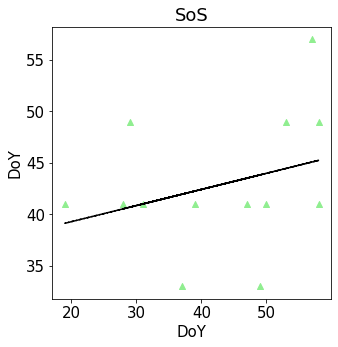

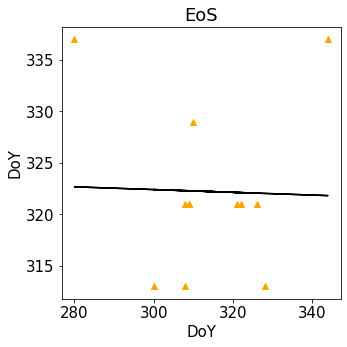

In [117]:
fig, sos = plt.subplots()

sos.scatter(x,y,marker = '^', color = 'lightgreen')
sos.plot(x, sosp(x), '--', color = 'black')
sos.set_title('SoS')
sos.set_ylabel('DoY')
sos.set_xlabel('DoY')
plt.savefig(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Figures\soscorr.jpeg', format= 'jpeg', dpi =400)

fig, eos=plt.subplots()

eos.scatter(x1,y1, marker='^', color = 'orange')
eos.plot(x1, eosp(x1), color = 'black')
eos.set_title('EoS')
eos.set_ylabel('DoY')
eos.set_xlabel('DoY')



plt.savefig(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Figures\eoscorr.jpeg', format= 'jpeg', dpi =400)
plt.show()